In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset=pd.read_csv('StudentPerformanceFactors.csv')
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


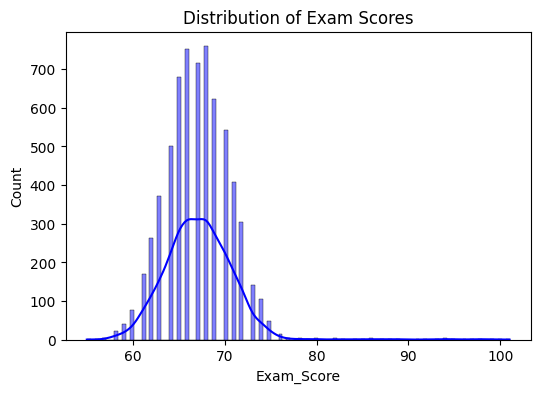

In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(dataset['Exam_Score'], kde=True, color='blue')
plt.title("Distribution of Exam Scores")
plt.show()

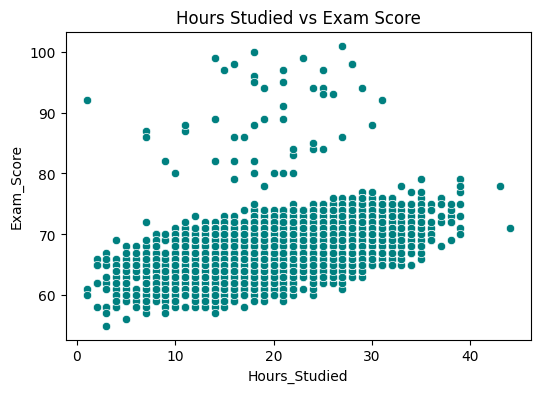

In [77]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=dataset, color='teal')
plt.title("Hours Studied vs Exam Score")
plt.show()


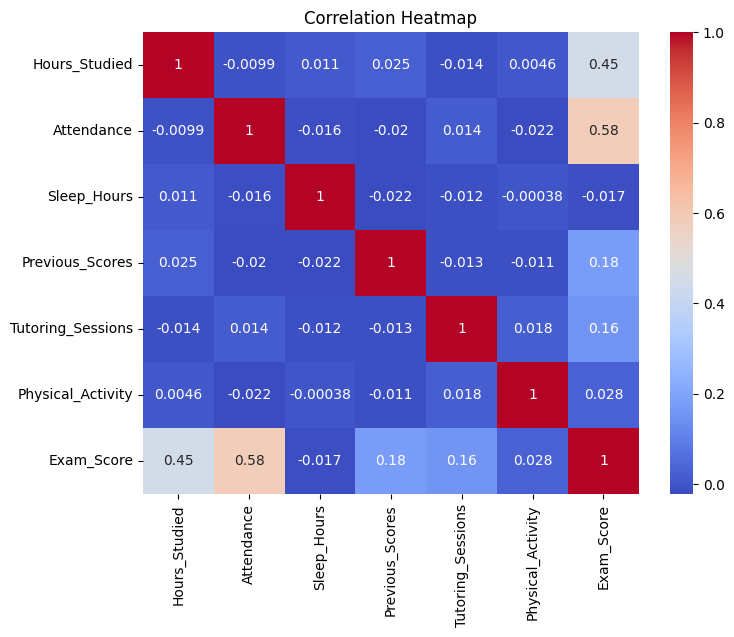

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [79]:
X = dataset[['Hours_Studied']].values
y = dataset['Exam_Score'].values

dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

In [80]:
X

array([[23],
       [19],
       [24],
       ...,
       [20],
       [10],
       [15]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error: 13.97
Root Mean Squared Error: 3.74
R² Score: 0.19


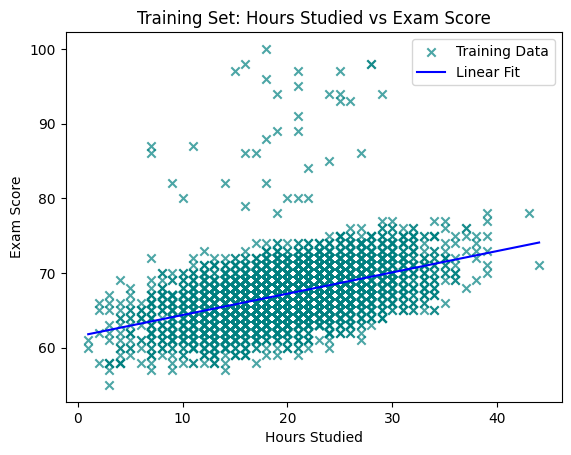

In [84]:
plt.scatter(X_train, y_train, color='teal', marker='x', alpha=0.7, label="Training Data")
sorted_idx_train = np.argsort(X_train[:, 0])
plt.plot(X_train[sorted_idx_train], regressor.predict(X_train[sorted_idx_train]), color='blue', label="Linear Fit")
plt.title('Training Set: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

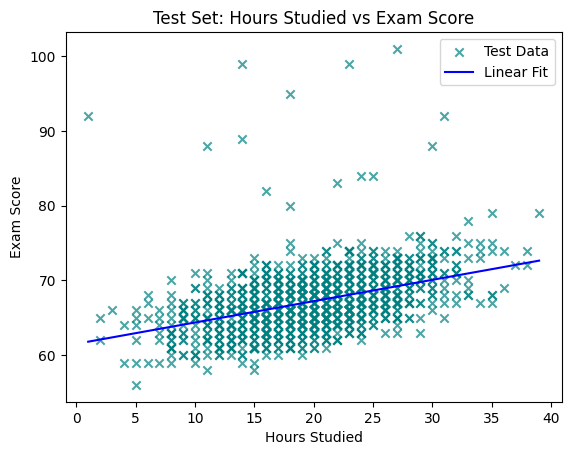

In [85]:
plt.scatter(X_test, y_test, color='teal', marker='x', alpha=0.7, label="Test Data")
sorted_idx_test = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_idx_test], regressor.predict(X_test[sorted_idx_test]), color='blue', label="Linear Fit")
plt.title('Test Set: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()